# Accessing the project directory on my Google Drive  

In [1]:
import os
from google.colab import drive

drive.mount('/drive', force_remount=False)
project_dir = "/drive/My Drive/RNNSeq2Seq/"

# change working directory to project_dir
os.chdir(project_dir)

Mounted at /drive


# Dependencies

In [2]:
from scripts.model import *
from scripts.dataloader import create_dataloader
from scripts.utils import *
from scripts.pytorch_utils import *
import matplotlib.pyplot as plt

# Helper function to help visualize 

In [3]:
def plot_log(log):
    len_range = len(log) -1 if "Best eval accu" in log else len(log)
    epoch_nums, train_loss, dev_loss = [], [], []
    train_acc, dev_acc = [], []

    for epoch in range(1, len_range+1):
        epoch_nums.append(epoch)
        train = log[f"Epoch#{epoch}"]["Train"]
        dev = log[f"Epoch#{epoch}"]["Eval"]
        train_loss.append(train['loss'])
        train_acc.append(train['abosulate accuracy'])

        dev_loss.append(dev['loss'])
        dev_acc.append(dev['abosulate accuracy'])

    ax1 = plt.subplot(211)
    ax1.plot(epoch_nums, train_loss, label="train loss")
    ax1.plot(epoch_nums, dev_loss, label="dev loss")
    ax1.legend()

    ax2 = plt.subplot(212)
    ax2.plot(epoch_nums, train_acc, label="train acc")
    ax2.plot(epoch_nums, dev_acc, label="dev acc")
    ax2.legend()
    plt.show()

In [4]:
folder = "tuning_data/"
experiment_num = 8
shuffle_batch = True

# must be the num of seq per seq length if shuffle_batch is False
# this "tr_batch_size" will be used for dev, and shuffled test sets
tr_batch_size = 250 
dev_batch_size = 500 if not shuffle_batch else tr_batch_size

In [5]:
# setups for training and evaluting

print_freq = 5
acc_threshold = 0.5 # for saving the best trained models 
max_epoch_num = 150 # max num of epoches 
train_acc_exit=0.92 # train acc exit threshold (eval_acc_exit must also be met)
eval_acc_exit=0.92 # dev acc exit threshold (train_acc_exit must also be met)
teacher_forcing_ratio = 1.0 # probability of using real symbol from target sequence for training

# RevStr

In [31]:
train = read_data(join(folder, "RevStr/train.txt"))
dev = read_data(join(folder, "RevStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_lstm_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1

In [7]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_vocab_size = len(in_vocab) + 2
out_vocab_size = len(out_vocab) + 2

hidden_size = 384
embd_dim = 256
num_layers = 1
rnn_type = "LSTM"
dropout_rate = 0.0
bidirectional = False
use_attention = False
reduction_method = torch.sum

learning_rate = 5e-3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [8]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.948648104071617, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006083333486458286, 'overlap rate': 0.425631707906723}
evaluation performance: {'loss': 3.1795352697372437, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006400706362910569, 'overlap rate': 0.42003601528704165}

Current epoch: 10, 
training performance: {'loss': 1.934552675485611, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006650000155786984, 'overlap rate': 0.4282067075371742}
evaluation performance: {'loss': 2.679040178656578, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000630000012824894, 'overlap rate': 0.42194920815527437}

Current epoch: 15, 
training performance: {'loss': 1.9614094376564026, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0005983333481708542, 'overlap rate': 0.4239217109978199}
evaluation performance: {'loss': 2.3844274640083314, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000

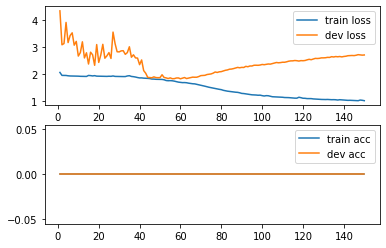

In [9]:
plot_log(log)

## Hyperparameter set 2

In [10]:
hidden_size = 256
embd_dim = 256
num_layers = 1
rnn_type = "LSTM"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9629811018705368, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006383333457051776, 'overlap rate': 0.42019170597195626}
evaluation performance: {'loss': 2.8084017813205717, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006750000167812687, 'overlap rate': 0.1953233528882265}

Current epoch: 10, 
training performance: {'loss': 1.8978750318288804, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007103672440280206, 'overlap rate': 0.4322619363665581}
evaluation performance: {'loss': 1.8985020622611046, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006508333433885127, 'overlap rate': 0.43058337457478046}

Current epoch: 15, 
training performance: {'loss': 1.8198237359523772, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0027133333845995367, 'overlap rate': 0.4522433802485466}
evaluation performance: {'loss': 1.8694949507713319, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 

## Hyperparameter set 3

In [12]:
hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9031374841928481, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.003861666703596711, 'overlap rate': 0.4466067127883434}
evaluation performance: {'loss': 3.944872087240219, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.004320000062580221, 'overlap rate': 0.4424525432288647}

Current epoch: 10, 
training performance: {'loss': 1.7104178696870804, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.006028333411086351, 'overlap rate': 0.48763837963342666}
evaluation performance: {'loss': 2.061710712313652, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.006596666754921899, 'overlap rate': 0.4748033806681633}

Current epoch: 15, 
training performance: {'loss': 1.3777598083019256, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.014476666878908872, 'overlap rate': 0.5656667232513428}
evaluation performance: {'loss': 1.6997854351997375, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.015303

## Hyperparameter set 4

In [14]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.796561312675476, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.010756666818633676, 'overlap rate': 0.4818567156791687}
evaluation performance: {'loss': 2.5580092787742617, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.013555000140331685, 'overlap rate': 0.4497300449758768}

Current epoch: 10, 
training performance: {'loss': 1.410011398792267, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.04271333375945687, 'overlap rate': 0.5739150628447532}
evaluation performance: {'loss': 1.9795726597309113, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.04291416727937758, 'overlap rate': 0.49319504760205746}

Current epoch: 15, 
training performance: {'loss': 1.108929741382599, 'abosulate accuracy': 0.0046000001719221474, 'consecutive overlap rate': 0.06966166747733951, 'overlap rate': 0.644095067679882}
evaluation performance: {'loss': 2.009225083887577, 'abosulate accuracy': 0.002500000107102096, 'consec

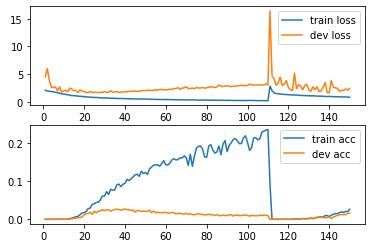

In [16]:
plot_log(log)

## Hyperparameter set 5

In [32]:
hidden_size = 384
embd_dim = 256
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9079382568597794, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.004885000037029385, 'overlap rate': 0.4474750429391861}
evaluation performance: {'loss': 2.154694679379463, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.003289166709873825, 'overlap rate': 0.45190421417355536}

Current epoch: 10, 
training performance: {'loss': 1.819888350367546, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.004708333354210481, 'overlap rate': 0.46617337986826896}
evaluation performance: {'loss': 1.932518607378006, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.005715000041527673, 'overlap rate': 0.4678658828139305}

Current epoch: 15, 
training performance: {'loss': 1.6466169238090516, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.00907666680868715, 'overlap rate': 0.5029617168009282}
evaluation performance: {'loss': 2.113767382502556, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.00981083

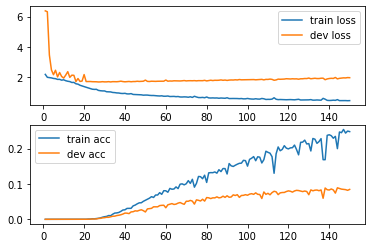

In [34]:
plot_log(log)

# RedStr



In [17]:
train = read_data(join(folder, "RedStr/train.txt"))
dev = read_data(join(folder, "RedStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [18]:
hidden_size = 384
embd_dim = 256
num_layers = 1
rnn_type = "LSTM"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9622537076473237, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006800000155635644, 'overlap rate': 0.41991337537765505}
evaluation performance: {'loss': 3.336808016896248, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006641666837822413, 'overlap rate': 0.24884669054299594}

Current epoch: 10, 
training performance: {'loss': 1.9419388890266418, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006966666776861529, 'overlap rate': 0.4277100436389446}
evaluation performance: {'loss': 2.222027304768562, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006650706367508974, 'overlap rate': 0.3893548987805843}

Current epoch: 15, 
training performance: {'loss': 1.9272176921367645, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0018116666906280443, 'overlap rate': 0.4302200436592102}
evaluation performance: {'loss': 1.9386324420571328, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.

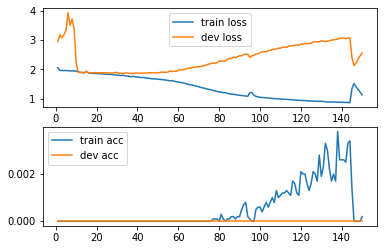

In [20]:
plot_log(log)

## Hyperparameter set 2

In [23]:
hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9659151166677475, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007050000160234049, 'overlap rate': 0.4180800408124924}
evaluation performance: {'loss': 3.8614037185907364, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006425000141462078, 'overlap rate': 0.4206658750772476}

Current epoch: 10, 
training performance: {'loss': 1.9298503011465074, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0008983333405922167, 'overlap rate': 0.43149504587054255}
evaluation performance: {'loss': 2.7057922720909118, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0009166666863166028, 'overlap rate': 0.4301917105913162}

Current epoch: 15, 
training performance: {'loss': 1.8860839664936067, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0015466666969587094, 'overlap rate': 0.443796706199646}
evaluation performance: {'loss': 1.9394246190786362, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.

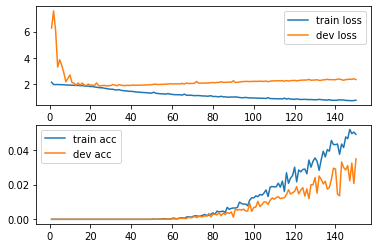

In [24]:
plot_log(log)

## Hyperparameter set 3

In [25]:
hidden_size = 384
embd_dim = 256
num_layers = 1
rnn_type = "LSTM"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-2
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9622588336467743, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006983333521930035, 'overlap rate': 0.41995337307453157}
evaluation performance: {'loss': 3.101398152112961, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006891666791489115, 'overlap rate': 0.1999683566391468}

Current epoch: 10, 
training performance: {'loss': 1.9598487168550491, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006466666804044507, 'overlap rate': 0.42069837749004363}
evaluation performance: {'loss': 3.3903320908546446, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006741666817106307, 'overlap rate': 0.2487708579748869}

Current epoch: 15, 
training performance: {'loss': 1.9552245885133743, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006433333437598776, 'overlap rate': 0.4235017068684101}
evaluation performance: {'loss': 2.228503069281578, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.

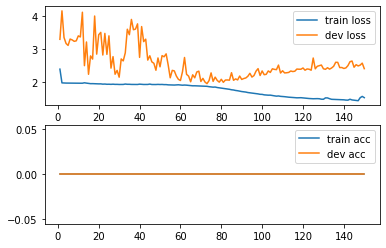

In [27]:
plot_log(log)

## Hyperparameter set 4

In [28]:
hidden_size = 384
embd_dim = 256
num_layers = 1
rnn_type = "LSTM"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-2
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9741000056266784, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006733333473675884, 'overlap rate': 0.41873170584440234}
evaluation performance: {'loss': 3.1599627524614333, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006758333478501299, 'overlap rate': 0.2208700181916356}

Current epoch: 10, 
training performance: {'loss': 1.9749627441167832, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006633333505305927, 'overlap rate': 0.4192200355231762}
evaluation performance: {'loss': 4.1968365669250485, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000683333347842563, 'overlap rate': 0.022620835900306703}

Current epoch: 15, 
training performance: {'loss': 1.981537225842476, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006966666867811, 'overlap rate': 0.4187583774328232}
evaluation performance: {'loss': 3.630972209572792, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000

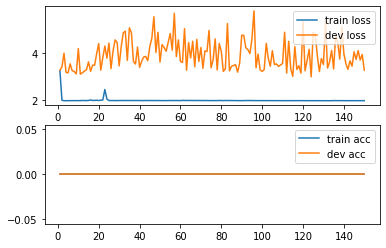

In [30]:
plot_log(log)